## Decision Tree Classification

In [30]:
# Import all required libraries
import pickle

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# Import feature and target columns
X = pickle.load(open("./common/feature_status.p", "rb"))
y = pickle.load(open("./common/target_status.p", "rb"))

### Perform Cross Validation

In [32]:
# Define the model
clf_cv = DecisionTreeClassifier()

# Define metrics
scoring = { 'accuracy': make_scorer(accuracy_score),
            'precision': make_scorer(precision_score),
            'recall': make_scorer(recall_score),
            'F1': make_scorer(f1_score) }

In [33]:
scores = cross_validate(clf_cv, X, y, cv=10, scoring=scoring)

In [34]:
# Print scores
for metric_name, score_array in scores.items():
    print(f'{metric_name}: {score_array.mean():.2f} (+/- {score_array.std() * 2:.2f})')

fit_time: 0.01 (+/- 0.00)
score_time: 0.03 (+/- 0.01)
test_accuracy: 0.93 (+/- 0.09)
test_precision: 0.71 (+/- 0.53)
test_recall: 0.71 (+/- 0.33)
test_F1: 0.67 (+/- 0.29)


### Train the model

In [35]:
X_test = pickle.load(open("./common/metrics_test.p", "rb"))
X_train = pickle.load(open("./common/metrics_train.p", "rb"))
y_test = pickle.load(open("./common/status_test.p", "rb"))
y_train = pickle.load(open("./common/status_train.p", "rb"))

In [36]:
# Create and train the model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
# Use the model to make predictions on the test set
y_pred = clf.predict(X_test)

In [38]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

Accuracy: 0.9607390300230947
Precision: 0.7741935483870968
Recall: 0.7058823529411765
F1: 0.7384615384615385


### Visualize the model

In [39]:
clf_matrix = confusion_matrix(y_test, y_pred)
clf_matrix

array([[392,   7],
       [ 10,  24]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted Label')

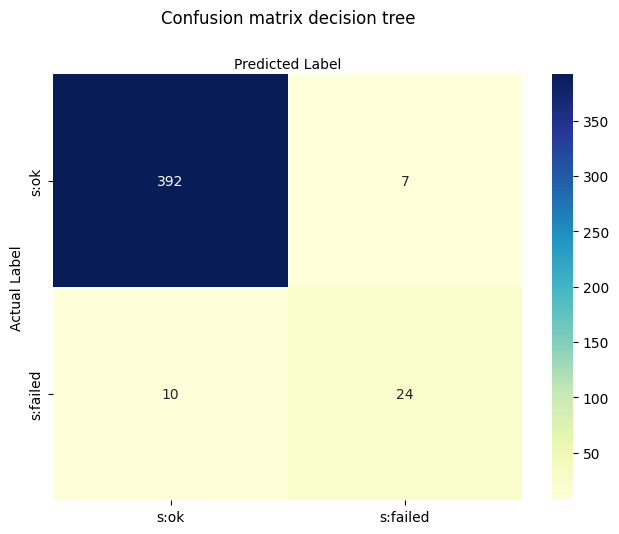

In [40]:
# Assuming clf_matrix is the confusion matrix you've computed
clf_matrix_df = pd.DataFrame(clf_matrix, index=["s:ok", "s:failed"], columns=["s:ok", "s:failed"])

# Create heatmap
class_names=["s:ok", "s:failed"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(clf_matrix_df, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix decision tree', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

### Export the model

In [41]:
pickle.dump(clf, open("./models/decision_tree.p", "wb"))